In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [45]:
df = pd.read_csv('./selected_indicators/CDA_ind.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1995,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1996,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1997,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1998,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1999,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
2000,0.000000,70.711776,39.507944,NaN,7.996337,NaN,22.963218,29.613071,60.450662,0.000000,...,27.870150,47.259556,22.835312,13.047796,0.000000,NaN,NaN,7.146259,80.483280,67.865435
2001,0.000000,31.235373,46.288313,NaN,16.020780,NaN,20.614809,32.854428,54.050373,0.000000,...,33.369319,40.193521,20.524930,10.474879,0.000000,NaN,NaN,1.699950,83.313881,77.531327
2002,0.000000,9.009048,50.189674,NaN,25.391659,NaN,17.762767,37.991844,35.089080,0.000000,...,37.466840,36.825488,24.656384,12.531216,0.000000,NaN,NaN,0.000000,76.990220,77.972072
2003,0.000000,0.000000,52.633144,NaN,32.521894,NaN,14.772714,42.051871,38.776405,0.000000,...,47.171202,33.386707,31.122095,13.099367,0.000000,NaN,NaN,2.968303,65.664572,73.749844
2004,0.000000,0.000000,56.195851,NaN,59.583613,NaN,14.375318,41.177809,40.153917,0.000000,...,50.787704,33.765270,51.842922,25.036151,0.000000,NaN,NaN,3.604949,54.094371,64.374679


In [46]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia
1995,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440
1996,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440
1997,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440
1998,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440
1999,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440
2000,38.988874,28.974760,15.684962,64.269802,33.277960,32.869710
2001,40.088260,33.481228,18.710206,58.212041,34.281739,34.158782
2002,41.197609,35.108062,22.138150,57.267443,40.557270,34.356940
2003,42.208955,30.820532,25.593435,57.037434,42.394879,35.414752
2004,42.955854,22.250162,27.480816,57.751313,40.369163,37.505466


In [47]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long


,index,country,value
0,1995.0,United States of America,40.022508
1,1996.0,United States of America,40.022508
2,1997.0,United States of America,40.022508
3,1998.0,United States of America,40.022508
4,1999.0,United States of America,40.022508
...,...,...,...
163,2018.0,Australia,61.633398
164,2019.0,Australia,59.399676
165,2020.0,Australia,59.399676
166,2021.0,Australia,59.399676


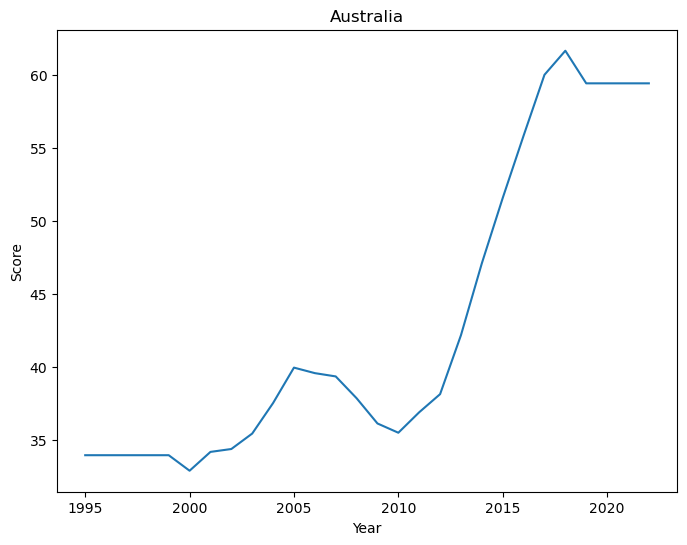

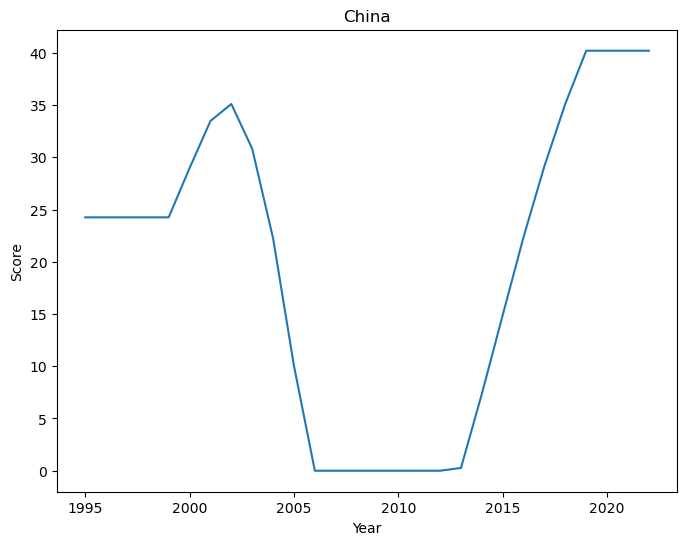

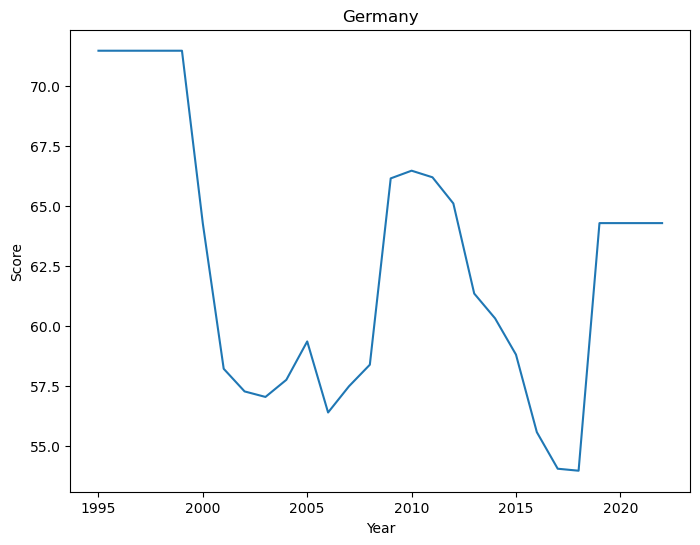

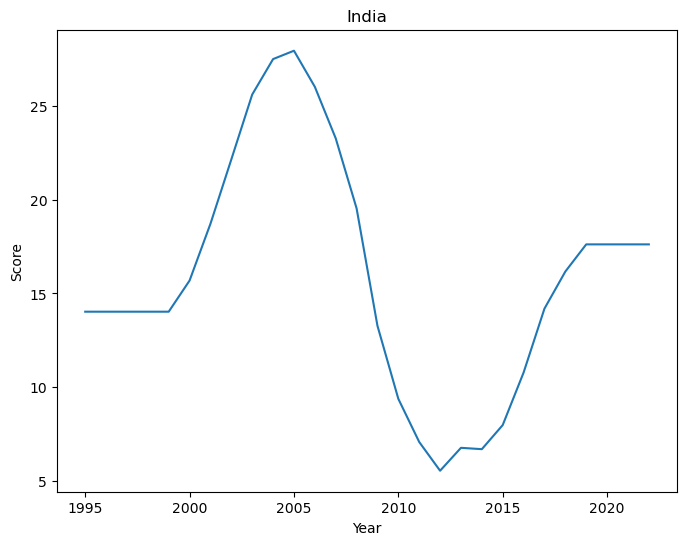

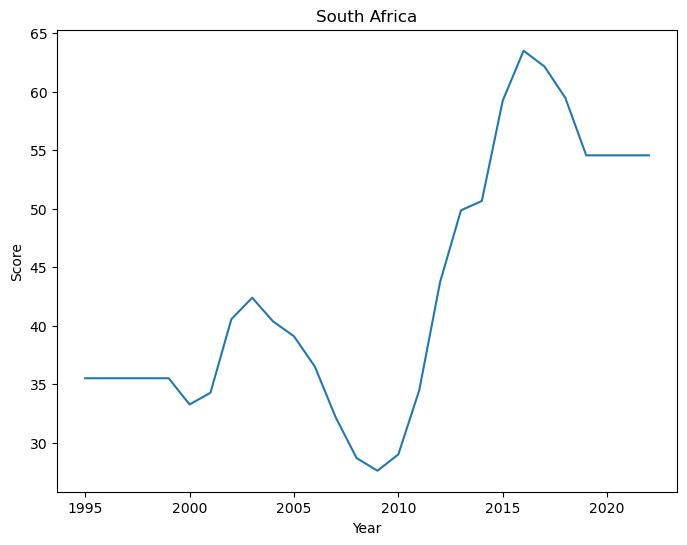

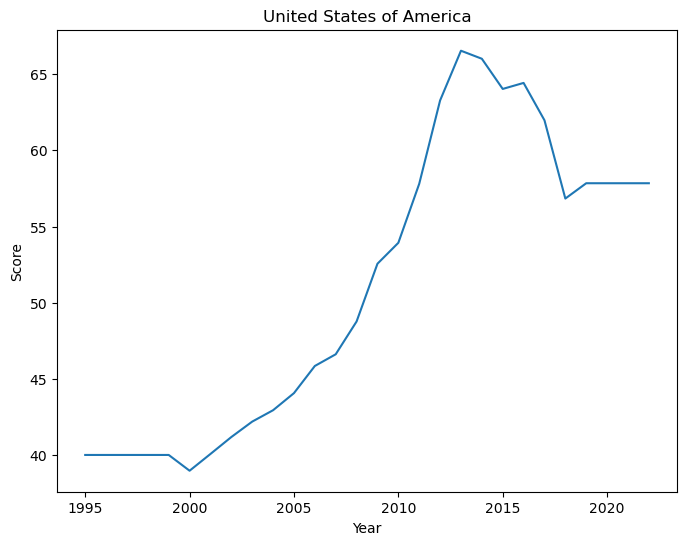

In [48]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')


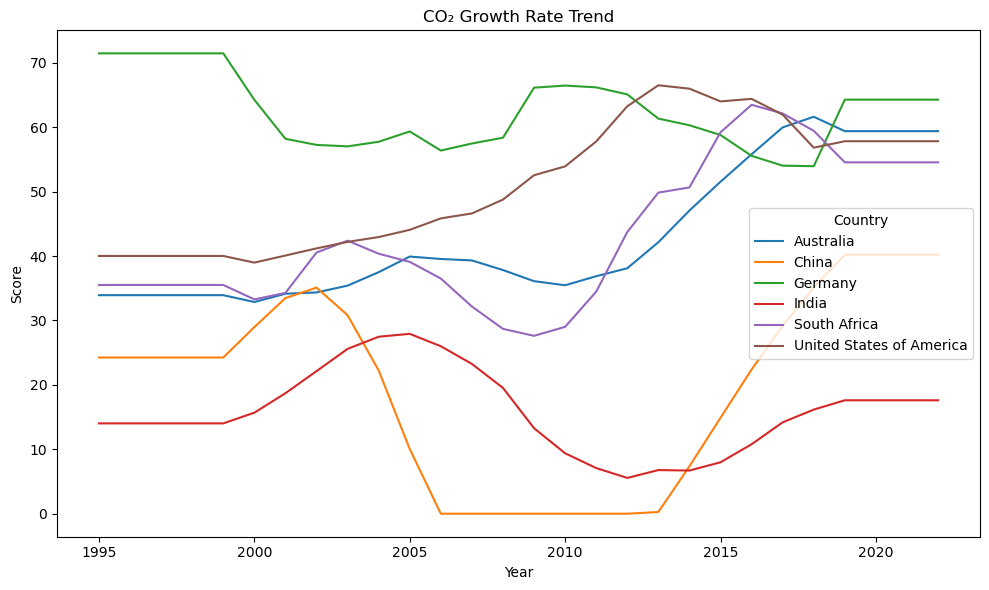

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('CO\u2082 Growth Rate Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("CDA.png")
plt.show()



Scatter Plots

In [61]:
df = pd.read_csv('./selected_indicators/PMD_ind.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1995,31.888537,31.195264,1.598379,61.564134,43.391023,NaN,26.823433,34.720554,3.535626,NaN,...,49.036213,0.0,43.794656,22.407152,41.164554,NaN,NaN,31.940345,40.753296,37.310154
1996,31.929716,31.133392,1.503918,61.949441,43.136586,NaN,28.415829,35.244252,3.857365,NaN,...,49.888419,0.0,42.990318,23.390310,40.488620,NaN,NaN,30.324985,40.420375,36.851400
1997,31.778854,31.253828,1.321336,62.247277,42.212224,NaN,29.118710,36.236645,5.437492,NaN,...,50.908930,0.0,42.416655,24.587247,39.694343,NaN,NaN,27.696919,39.920510,35.654245
1998,31.690213,30.927788,1.355472,62.283547,40.708200,NaN,29.732326,37.059923,6.296535,NaN,...,51.033081,0.0,41.976141,23.923131,38.801772,NaN,NaN,25.082651,39.226324,33.862325
1999,31.620938,29.954299,1.198697,62.496568,39.480412,NaN,30.310921,38.118998,6.513198,NaN,...,51.916268,0.0,41.314981,24.173162,37.795488,NaN,NaN,22.630897,38.658887,32.087172
2000,31.823607,29.971210,1.669854,62.753327,38.788663,NaN,31.209426,39.965437,7.340602,NaN,...,53.308051,0.0,41.918359,24.566436,36.721163,NaN,NaN,21.081179,38.201831,30.521716
2001,32.275944,31.537565,2.438892,63.610697,38.723449,NaN,32.146820,40.795461,7.145079,NaN,...,54.659072,0.0,41.793681,24.419046,35.364378,NaN,NaN,20.316449,38.116024,30.208776
2002,33.439623,31.048734,3.250365,65.006488,39.029271,NaN,33.415269,41.113379,7.027605,NaN,...,55.839396,0.0,42.957613,24.542750,33.927876,NaN,NaN,19.451904,38.266322,29.617592
2003,32.963398,29.905489,4.055054,66.453787,39.009130,NaN,34.592195,41.884606,6.457883,NaN,...,56.842148,0.0,43.761627,23.775462,32.366486,NaN,NaN,18.829009,38.087804,29.354846
2004,32.957967,29.962317,4.870083,67.664036,38.271189,NaN,35.598742,43.573618,6.328974,NaN,...,58.839113,0.0,43.850708,26.281745,30.840678,NaN,NaN,18.192109,37.652520,28.947719


In [62]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia,Brazil
1995,43.000459,10.620134,13.291174,35.221162,10.981657,75.873322,33.387359
1996,43.967280,10.302975,12.807347,36.858112,9.816742,76.789594,33.668175
1997,44.997240,9.974117,11.257892,38.801522,6.417300,78.053115,34.465225
1998,45.880026,9.568694,10.422911,40.894039,5.871181,79.378740,34.730250
1999,46.546850,9.007490,10.164845,42.839056,6.247888,80.647290,35.140777
2000,47.431001,8.456187,9.567882,44.685012,5.206255,82.052778,35.767427
2001,48.314886,8.548766,8.997263,46.330337,5.584297,83.623812,36.363342
2002,49.245449,8.462500,8.626183,47.566594,5.407666,85.230271,36.784754
2003,50.453930,8.539453,8.675996,48.781566,5.150283,87.123801,37.049432
2004,52.125344,8.340536,9.229781,50.651834,5.436723,89.144662,37.332664


In [63]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long

,index,country,value
0,1995.0,United States of America,43.000459
1,1996.0,United States of America,43.967280
2,1997.0,United States of America,44.997240
3,1998.0,United States of America,45.880026
4,1999.0,United States of America,46.546850
...,...,...,...
191,2018.0,Brazil,50.122967
192,2019.0,Brazil,50.313288
193,2020.0,Brazil,50.313288
194,2021.0,Brazil,50.313288


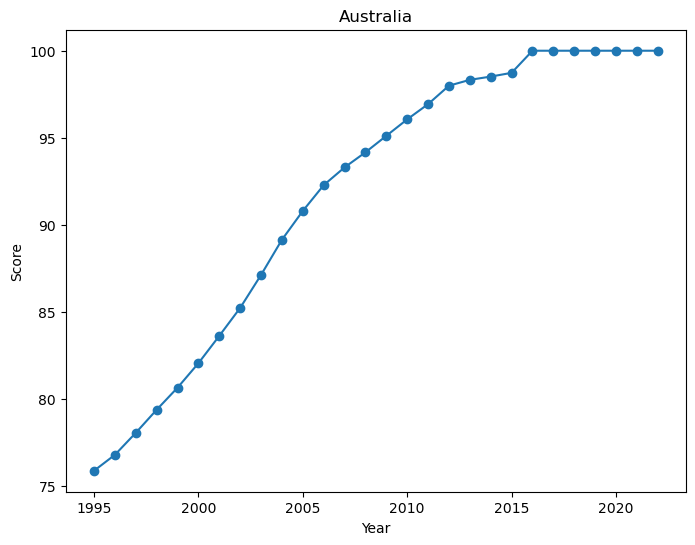

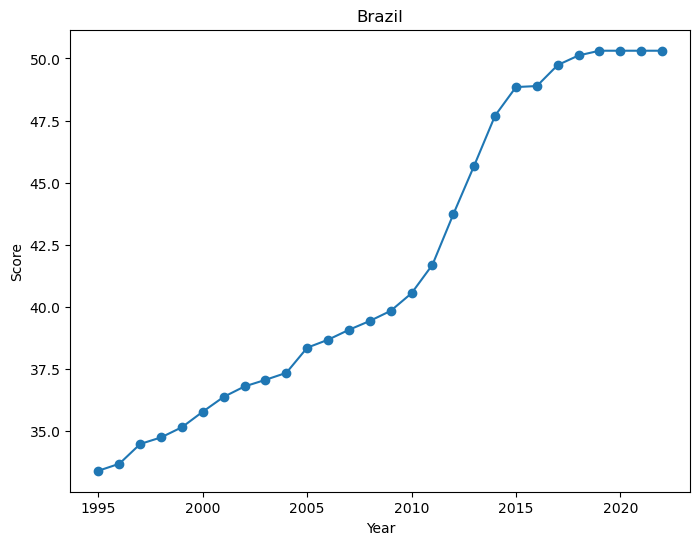

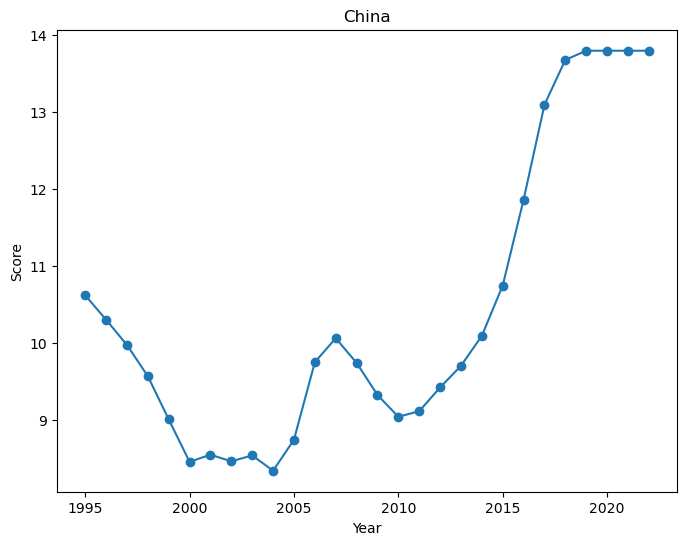

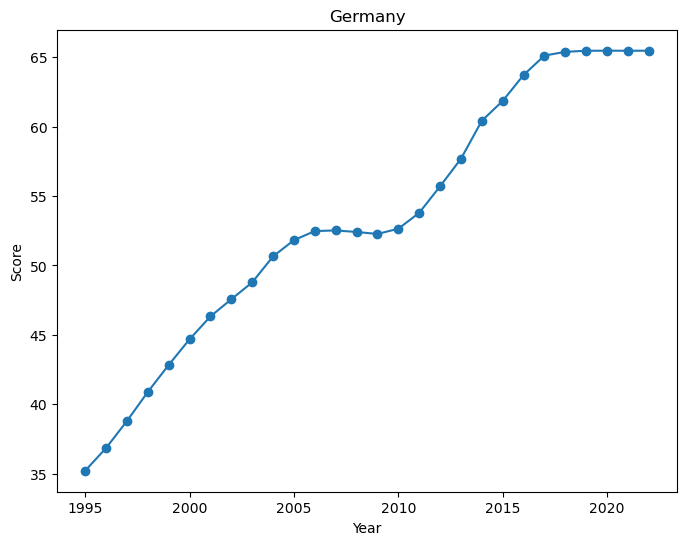

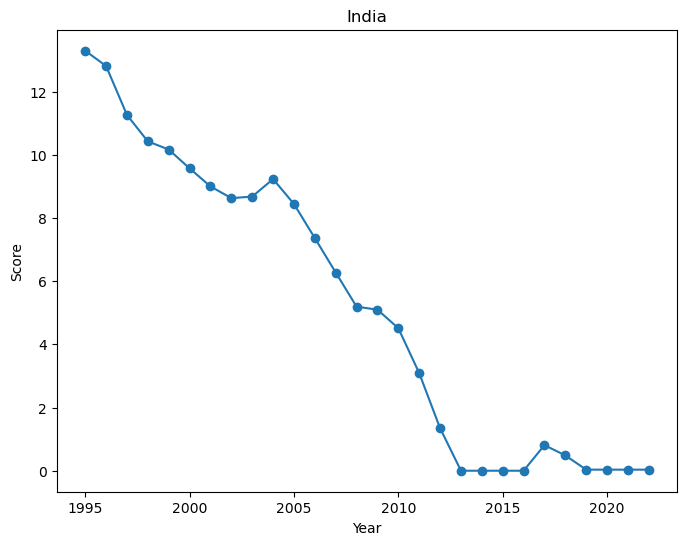

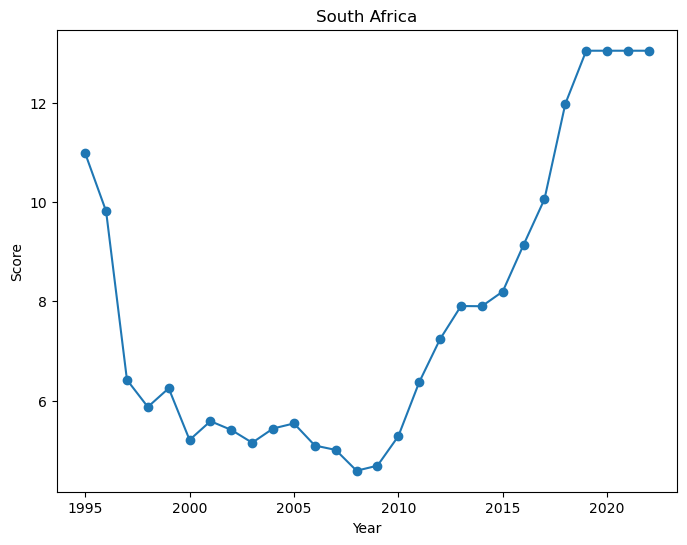

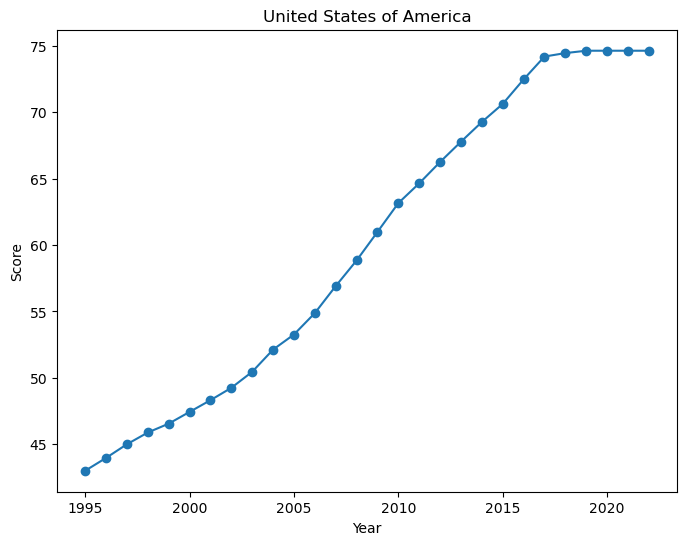

In [64]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], marker='o', label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')


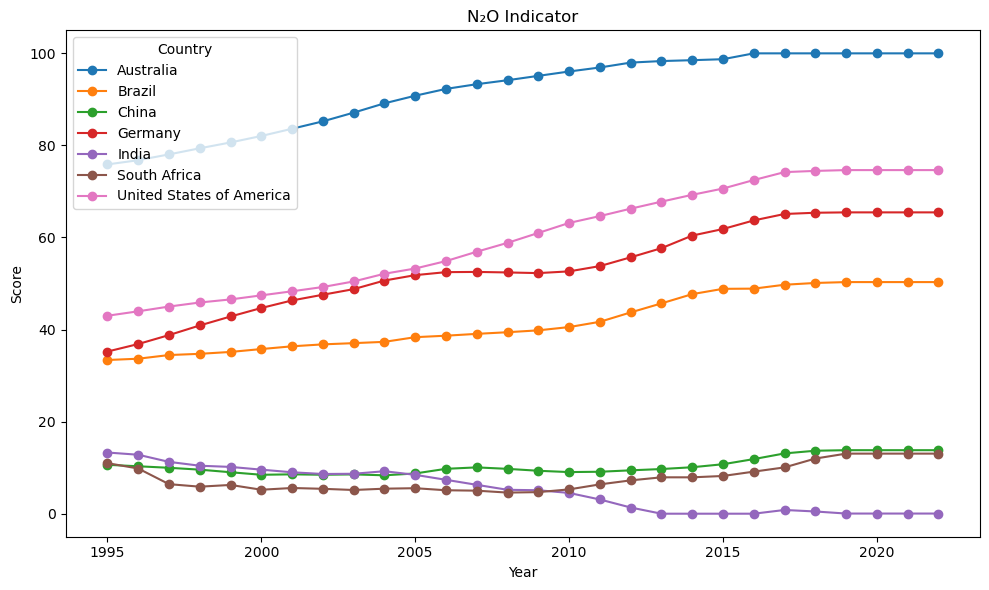

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], marker='o', label=country)

ax.set_title('N\u2082O Indicator')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("PMD.png")
plt.show()



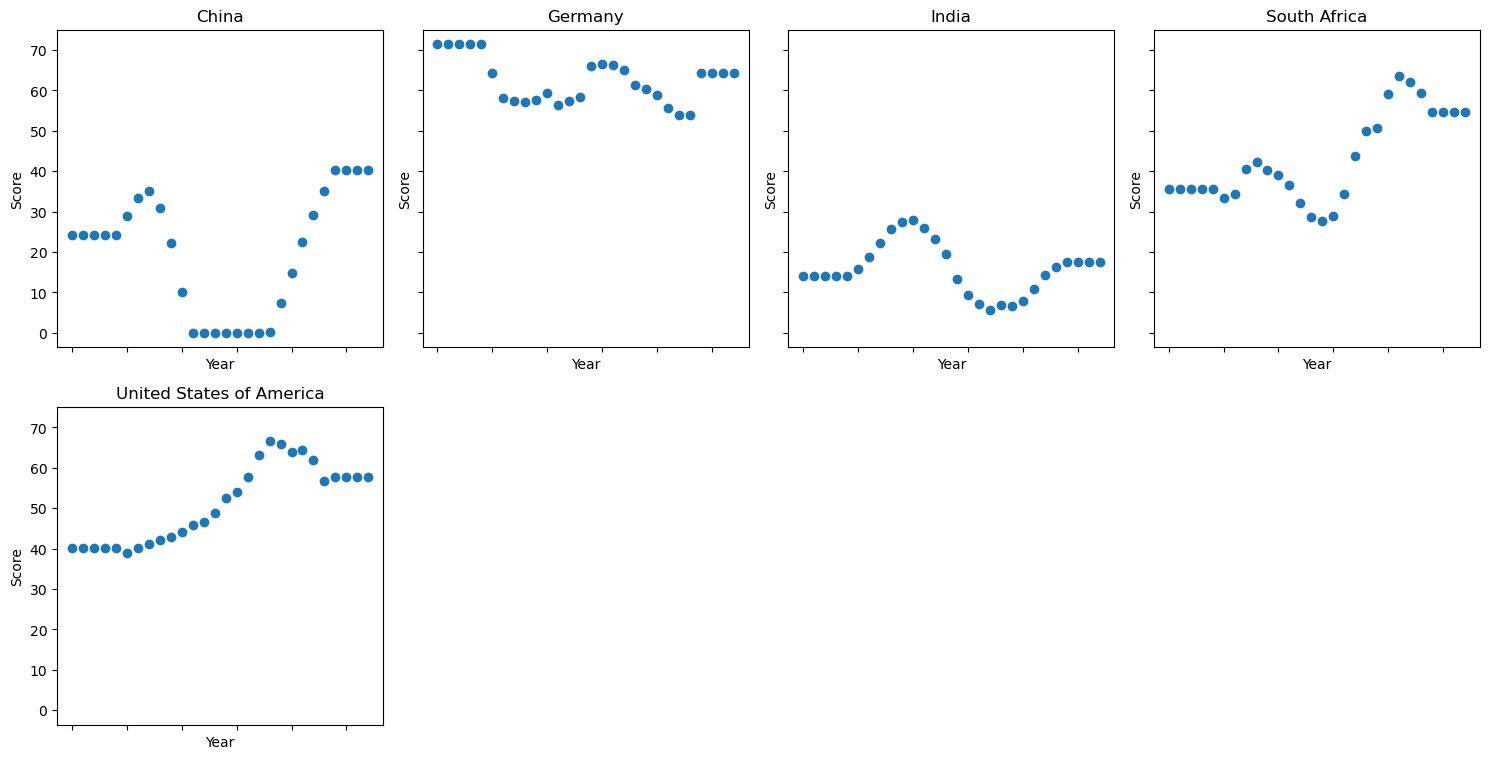

In [7]:
rows = 4
cols = 4
num_plots = rows * cols
# Calculate how many figure pages are needed to display data for all countries
num_pages = math.ceil(len(df_long['country'].unique()) / num_plots)
for page in range(num_pages):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharex=True, sharey=True)
    axes = axes.flatten()
    
    for idx, (country, data) in enumerate(df_long.groupby('country')):
        if page * num_plots <= idx < (page + 1) * num_plots:
            ax = axes[idx % num_plots]
            ax.scatter(data['index'], data['value'], marker='o', label=country)
            ax.set_title(country)
            ax.set_xlabel('Year')
            ax.set_ylabel('Score')

    # If the last subplot is not full, remove the excess subplots
    for i in range(idx % num_plots + 1, num_plots):
        fig.delaxes(axes[i])

    fig.tight_layout()
    # plt.savefig(f'scatter_plot_page_{page + 1}.png')

plt.show()

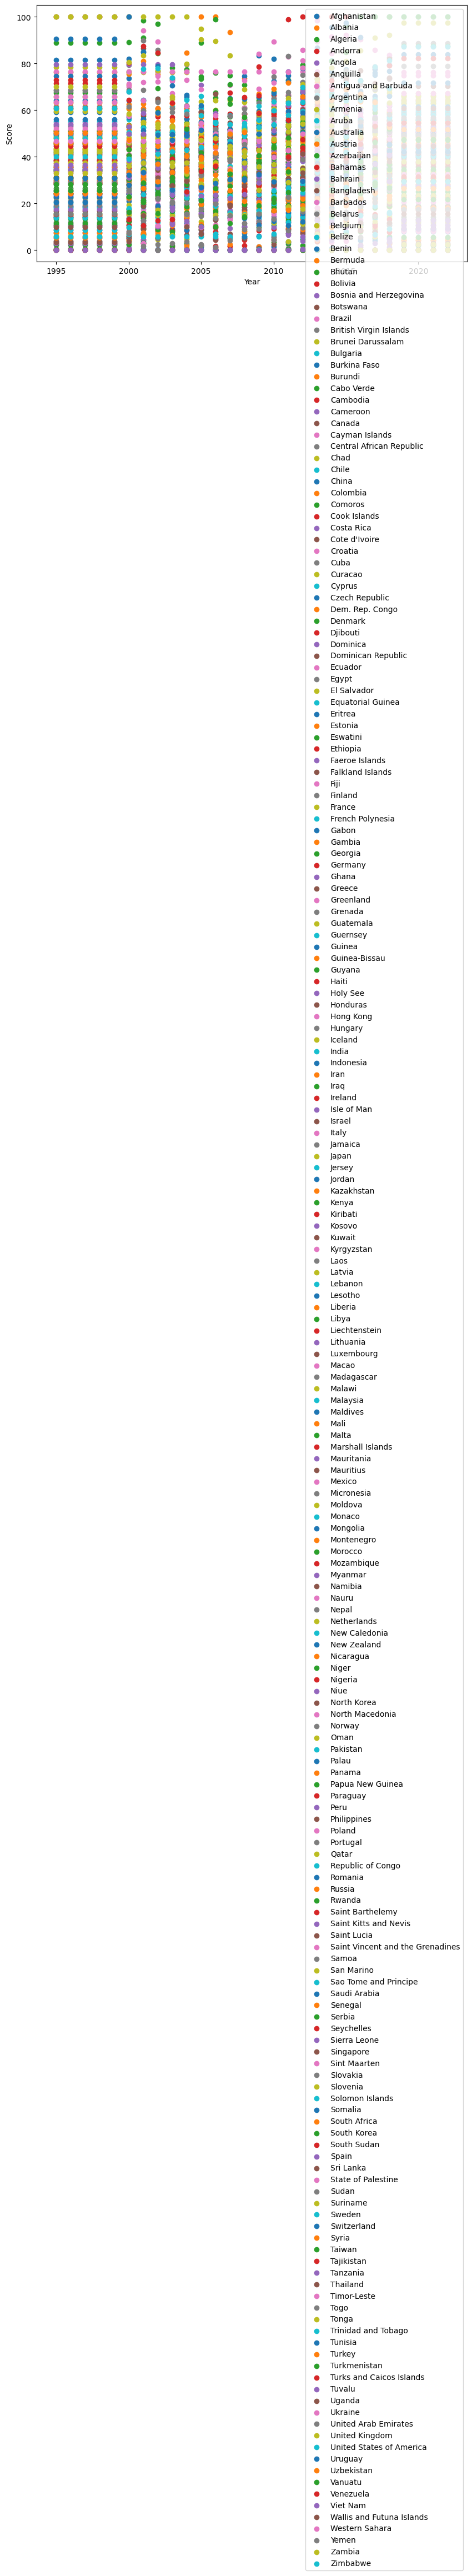

In [54]:
plt.figure(figsize=(10, 6))
for country, data in df_long.groupby('country'):
    plt.scatter(data['index'], data['value'], marker='o', label=country)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()
